In [52]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.stats import chi2_contingency 
import plotly.express as px 
import plotly.graph_objs as pgo
from plotly.subplots import make_subplots
from sklearn import linear_model 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans 
df = pd.read_csv (r'.\data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [53]:
df.head(n=10)

acousticness                            artists  danceability  duration_ms  \
0      0.991000                    ['Mamie Smith']         0.598       168333   
1      0.643000          ["Screamin' Jay Hawkins"]         0.852       150200   
2      0.993000                    ['Mamie Smith']         0.647       163827   
3      0.000173                ['Oscar Velazquez']         0.730       422087   
4      0.295000                           ['Mixe']         0.704       165224   
5      0.996000  ['Mamie Smith & Her Jazz Hounds']         0.424       198627   
6      0.992000                    ['Mamie Smith']         0.782       195200   
7      0.996000  ['Mamie Smith & Her Jazz Hounds']         0.474       186173   
8      0.996000               ['Francisco Canaro']         0.469       146840   
9      0.006820                         ['Meetya']         0.571       476304   

   energy  explicit                      id  instrumentalness  key  liveness  \
0  0.2240         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1  0.5170         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2  0.1860         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3  0.7980         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4  0.7070         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   
5  0.2450         0  3HnrHGLE9u2MjHtdobfWl9          0.799000    5    0.2350   
6  0.0573         0  5DlCyqLyX2AOVDTjjkDZ8x          0.000002    5    0.1760   
7  0.2390         0  02FzJbHtqElixxCmrpSCUa          0.186000    9    0.1950   
8  0.2380         0  02i59gYdjlhBmbbWhf8YuK          0.960000    8    0.1490   
9  0.7530         0  06NUxS2XL3efRh0bloxkHm          0.873000    8    0.0920   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   
5   -11.470     1                        Crazy Blues - 78rpm Version   
6   -12.453     1                       Don't You Advertise Your Man   
7    -9.712     1                                     Arkansas Blues   
8   -18.717     1                       La Chacarera - Remasterizado   
9    -6.943     1                       Broken Puppet - Original Mix   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920  
5           9         1920       0.0397  103.870   0.4770  1920  
6           5         1920       0.0592   85.652   0.4870  1920  
7           0         1920       0.0289   78.784   0.3660  1920  
8           0   1920-07-08       0.0741  130.060   0.6210  1920  
9           0   1920-01-01       0.0446  126.993   0.1190  1920

In [54]:
df.tail(n=10)

acousticness                             artists  danceability  \
174379       0.79500                    ['Alessia Cara']         0.429   
174380       0.04840              ['Stephan F', 'YA-YA']         0.693   
174381       0.79500                    ['Alessia Cara']         0.429   
174382       0.14100        ['BigBankCarti', 'Keyvo400']         0.544   
174383       0.79500                    ['Alessia Cara']         0.429   
174384       0.00917  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385       0.79500                    ['Alessia Cara']         0.429   
174386       0.80600                       ['Roger Fly']         0.671   
174387       0.92000                    ['Taylor Swift']         0.462   
174388       0.23900                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
174379       144720   0.211         0  45XnLMuqf3vRfskEAMUeCH   
174380       177148   0.826         0  1Cbf6PLWsL4s51eFepXx6L   
174381       144720   0.211         0  4pPFI9jsguIh3wC7Otoyy8   
174382       215014   0.407         1  3ASGdyWXeXsXtOIWtm0tv4   
174383       144720   0.211         0  52YtxLVUyvtiGPxwwxayHZ   
174384       147615   0.866         0  46LhBf6TvYjZU2SMvGZAbn   
174385       144720   0.211         0  7tue2Wemjd0FZzRtDrQFZd   
174386       218147   0.589         0  48Qj61hOdYmUCFJbpQ29Ob   
174387       244000   0.240         1  1gcyHQpBQ1lfXGdhZmWrHP   
174388       197710   0.460         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  \
174379          0.000000    4     0.196   -11.665     1   
174380          0.000012    1     0.231    -2.669     1   
174381          0.000000    4     0.196   -11.665     1   
174382          0.000000    4     0.253   -12.745     0   
174383          0.000000    4     0.196   -11.665     1   
174384          0.000060    6     0.178    -5.089     0   
174385          0.000000    4     0.196   -11.665     1   
174386          0.920000    4     0.113   -12.393     0   
174387          0.000000    0     0.113   -12.077     1   
174388          0.891000    7     0.215   -12.237     1   

                             name  popularity release_date  speechiness  \
174379              A Little More           0   2021-01-22       0.0360   
174380  Only Tonight - Radio Edit           0   2020-12-25       0.0762   
174381              A Little More           0   2021-01-22       0.0360   
174382                      LayUp           0   2020-12-31       0.2330   
174383              A Little More           0   2021-01-22       0.0360   
174384                    The One           0   2020-12-25       0.0356   
174385              A Little More           0   2021-01-22       0.0360   
174386                   Together           0   2020-12-09       0.0282   
174387         champagne problems          69   2021-01-07       0.0377   
174388             Improvisations           0   2020-12-09       0.0258   

          tempo  valence  year  
174379   94.710    0.228  2021  
174380  126.049    0.361  2020  
174381   94.710    0.228  2021  
174382  129.750    0.490  2020  
174383   94.710    0.228  2021  
174384  125.972    0.186  2020  
174385   94.710    0.228  2021  
174386  108.058    0.714  2020  
174387  171.319    0.320  2021  
174388  112.208    0.747  2020

In [55]:
df.shape

(174389, 19)

There are 174389 tracks in the dataset with each track being described by 19 features.

In [56]:
df.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

Description of the Coulmns of the Dataset:

Obtained from Data Source

valence: The positiveness of the track. Higher values mean, the track evokes positive emotions (like joy) otherwise means, it evokes negative emotions (like anger, fear). Ranges between 0-1.

year: The release year of the track.

acousticness: The value that describes how acoustic a song is. Higher values mean that the song is most likely to be an acoustic one. Ranges between 0-1.

artists: The list of artists credited for the production of the track.

danceability: The relative measurement of the track being danceable. Higher values mean that the song is more danceable. Ranges between 0-1.

duration: The length of the track. In milliseconds.

energy: The energy value of the track. Higher values mean that the song is more energetic. Ranges between 0-1.

explicit: The binary value whether the track contains explicit content or not.

id: The primary identifier for the track, generated by Spotify

instrumentalness: The relative ratio of the track being instrumental. Higher values mean that the song contains more instrumental sounds. Ranges between 0-1.

key: All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1, etc.

liveness: Detects the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. Ranges between 0-1.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 dB.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

name: The name of the song.

popularity: The popularity of the song. Ranges between 0 and 100.

release date: The date of release of the track in yyyy-mm-dd, yyyy-mm, or even yyyy format

speechiness: The relative length of the track containing any kind of human voice. Ranged between 0-1.

tempo: The tempo of the track in Beat Per Minute (BPM)

In [57]:
x = df.sort_values(by="release_date",ascending=False)

In [58]:
print("\nOldest Record")
print(x.iloc[-1])


Oldest Record
acousticness                           0.991
artists                      ['Mamie Smith']
danceability                           0.598
duration_ms                           168333
energy                                 0.224
explicit                                   0
id                    0cS0A1fUEUd1EW3FcF8AEI
instrumentalness                    0.000522
key                                        5
liveness                               0.379
loudness                             -12.628
mode                                       0
name                Keep A Song In Your Soul
popularity                                12
release_date                            1920
speechiness                           0.0936
tempo                                149.976
valence                                0.634
year                                    1920
Name: 0, dtype: object


The oldest record is a song called "Keep a Song in Your Soul"  by Mamie Smith released in 1920.  https://open.spotify.com/track/0cS0A1fUEUd1EW3FcF8AEI?si=XUxI1s9aTSuf__oQAFfWQA

In [59]:
print("\nNewest Record")
print(x.iloc[0])


Newest Record
acousticness                                                    0.927
artists             ['Mysterious World Music', 'Relaxing Zen Music...
danceability                                                     0.76
duration_ms                                                    188586
energy                                                          0.032
explicit                                                            0
id                                             4A9UXaikbiWeGtjFXCVpZI
instrumentalness                                                0.951
key                                                                 3
liveness                                                       0.0763
loudness                                                      -13.463
mode                                                                1
name                                                        Laba Soup
popularity                                                          0
relea

The newest record is a song called "Improvisations" by Roger Fly released in 2020. https://open.spotify.com/track/57tgYkWQTNHVFEt6xDKKZj?si=9okDTB6LS0ORgB34OAjvEw

In [60]:
df['duration'] =df['duration_ms'].apply(lambda x:round(x/1000))
df.drop('duration_ms',axis=1,inplace=True)

Since we have data about tracks spanning over almost 100 years; A time-series analysis of the data might give some relevant insights.

In [61]:
df_year = pd.read_csv (r'.\data_by_year.csv')
acousticness=np.array(df_year['acousticness'])
danceability=np.array(df_year['danceability'])
energy=np.array(df_year['energy'])
valence=np.array(df_year['valence'])
liveness=np.array(df_year['liveness'])
instrumentalness=np.array(df_year['instrumentalness'])
speechiness=np.array(df_year['speechiness'])
duration_ms=(np.array(df_year['duration_ms']))
tempo=(np.array(df_year['tempo']))
loudness=(np.array(df_year['loudness']))
popularity=(np.array(df_year['popularity']))
x_vals=np.array(df_year['year'])

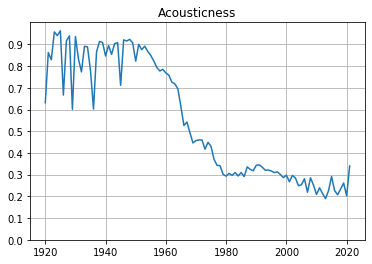

In [62]:
plt.plot(x_vals,acousticness,label='acousticness')
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title("Acousticness")
plt.show()

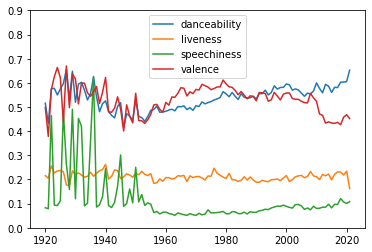

In [63]:
plt.plot(x_vals,danceability,label='danceability')
plt.yticks(np.arange(0, 1, 0.1))
#plt.grid()
'''
plt.title("Danceability")
plt.show()
'''

plt.plot(x_vals,liveness,label='liveness')
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
#plt.title("Liveness")
#plt.show()

plt.plot(x_vals,speechiness,label='speechiness')
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
#plt.title("Speechiness")
#plt.show()

plt.plot(x_vals,valence,label='valence')
plt.yticks(np.arange(0, 1, 0.1))
#plt.grid()
#plt.title("Valence")
plt.legend()
plt.show()

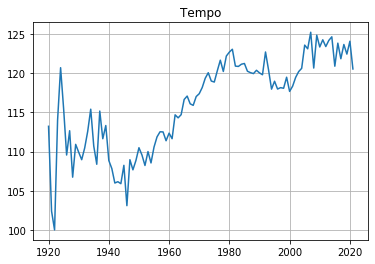

In [64]:
plt.plot(x_vals,tempo,label='tempo')
plt.title("Tempo")
plt.grid()
plt.show()

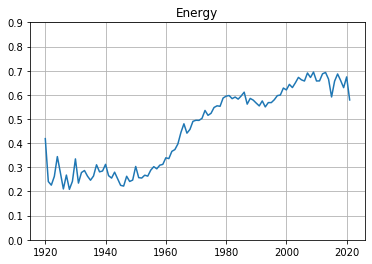

In [65]:
plt.plot(x_vals,energy,label='energy')
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title("Energy")
plt.show()

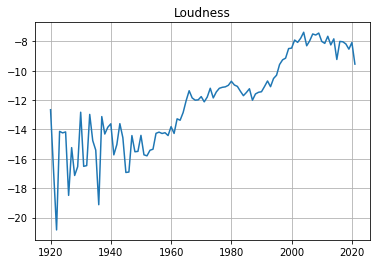

In [66]:
plt.plot(x_vals,loudness,label='loudness')
plt.title("Loudness")
plt.grid()
plt.show()

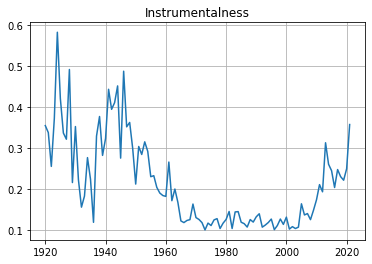

In [67]:
plt.plot(x_vals,instrumentalness,label='instrumentalness')
plt.title("Instrumentalness")
plt.grid()
plt.show()

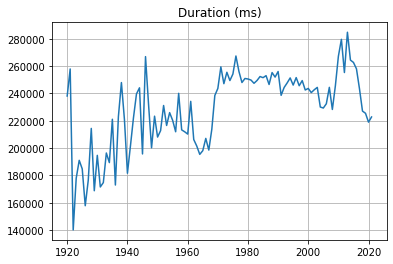

In [68]:
plt.plot(x_vals,duration_ms,label='duration')
plt.title("Duration (ms)")
plt.grid()
plt.show()

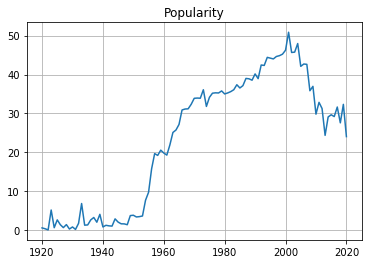

In [69]:
plt.plot(x_vals[:len(x_vals)-1],popularity[:len(popularity)-1],label='popularity')
plt.title("Popularity")
plt.grid()
plt.show()

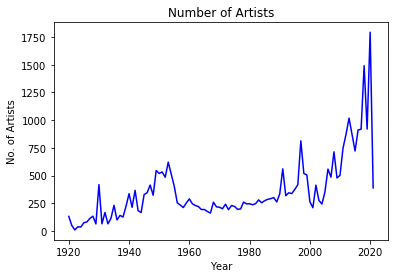

              Year  No_of_artists
count   102.000000     102.000000
mean   1970.500000     354.852941
std      29.588849     283.907229
min    1920.000000       9.000000
25%    1945.250000     198.500000
50%    1970.500000     261.000000
75%    1995.750000     417.750000
max    2021.000000    1793.000000


In [70]:
artists_data = {}
added = []
for year in df['year'].unique():
    total_artist = []
    for artist in df[df.year == year]['artists'].unique():
        if artist not in added:
            total_artist.append(artist)
    artists_data[year] = len(total_artist)
    added.extend(total_artist)
artists_record = pd.DataFrame({'Year': list(artists_data.keys()),'No_of_artists': list(artists_data.values())})
sn.lineplot('Year', 'No_of_artists', color='blue', data=artists_record[:-1])
plt.title('Number of Artists')
plt.xlabel('Year')
plt.ylabel('No. of Artists')
plt.show()
print(artists_record.describe())


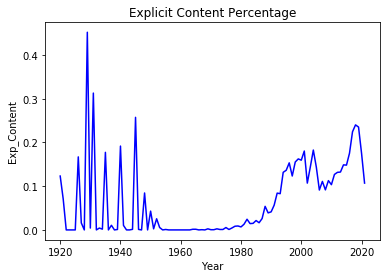

In [71]:
grouped_df=df.groupby('year')
mean_df = grouped_df.mean()['explicit']
sn.lineplot(color='blue', data=mean_df)
plt.title('Explicit Content Percentage')
plt.xlabel('Year')
plt.ylabel('Exp_Content')
plt.show()


In [72]:
avg_exp=len(df[df.explicit==1])/174389
print(avg_exp)
years_moreavgexp=mean_df[mean_df>avg_exp]
print(years_moreavgexp)

0.0681350314526719
year
1920    0.123209
1921    0.070513
1926    0.167043
1929    0.452156
1931    0.313017
1935    0.177450
1940    0.191788
1945    0.257500
1948    0.084500
1992    0.084163
1993    0.082920
1994    0.131748
1995    0.136432
1996    0.153389
1997    0.123335
1998    0.155359
1999    0.162410
2000    0.159520
2001    0.180428
2002    0.107056
2003    0.143987
2004    0.182674
2005    0.143290
2006    0.091244
2007    0.110945
2008    0.091612
2009    0.112748
2010    0.103519
2011    0.126862
2012    0.131700
2013    0.132342
2014    0.148757
2015    0.148261
2016    0.175394
2017    0.224490
2018    0.240236
2019    0.235294
2020    0.175361
2021    0.107065
Name: explicit, dtype: float64


In [73]:
year1929_df=df[df.year==1929]
year_1929_exp=year1929_df[year1929_df.explicit==1]
print(len(year_1929_exp))
print(pd.unique(year_1929_exp['artists']))

430
["['Эрнест Хемингуэй']" "['Эрих Мария Ремарк']"
 "['Psycoprata', 'SativanderGround', 'Enfediskoz', 'Denominado chu', 'Mist Kiila']"
 "['Psycoprata', 'SativanderGround']"]


In [74]:
x = df.copy().groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
print("Top 10 Artists by Sum of Popularity of their songs\n")
print(x)

Top 10 Artists by Sum of Popularity of their songs

artists
['The Beatles']           19110
['Frank Sinatra']         17434
['Elvis Presley']         16998
['Fleetwood Mac']         15927
['The Rolling Stones']    15817
['Bob Dylan']             14057
['Led Zeppelin']          12823
['Taylor Swift']          12697
['Queen']                 12450
['Johnny Cash']           12011
Name: popularity, dtype: int64


This list may even be considered as the most popular artists in history on Spotify as summing the popluarity ensures that they have released a good number of songs and that most of their songs are popular.

In [75]:
x=df.sort_values(by="popularity",ascending=False).head(10)
print("Top 10 Most Popular Songs on Spotify\n")
x[["artists","name","popularity","year"]]

Top 10 Most Popular Songs on Spotify



artists                    name  popularity  year
20062            ['Olivia Rodrigo']         drivers license         100  2021
19862     ['24kGoldn', 'iann dior']  Mood (feat. iann dior)          96  2020
19866             ['Ariana Grande']               positions          96  2020
19886  ['Bad Bunny', 'Jhay Cortez']                  DÁKITI          95  2020
19976                   ['KAROL G']                 BICHOTA          95  2020
19868             ['Ariana Grande']                   34+35          94  2020
19870                        ['CJ']                 Whoopty          94  2020
19872             ['The Kid LAROI']             WITHOUT YOU          94  2020
19876             ['Billie Eilish']          Therefore I Am          94  2020
19928      ['Bad Bunny', 'ROSALÍA']      LA NOCHE DE ANOCHE          94  2020

The most popular songs on Spotify are all released very recently (2020/2021). This indicates that spotify users tend to prefer newer songs.

In [76]:
pop_song=df.groupby('year').apply(lambda group: group.nlargest(1, columns='popularity')).reset_index(level=-1, drop=True)[['name','artists','popularity']]
print("Most Popular Song of Each Year\n")
pop_song[-10:]

Most Popular Song of Each Year



name                    artists  \
year                                                                           
2012  It's Beginning to Look a Lot like Christmas          ['Michael Bublé']   
2013                              Sweater Weather      ['The Neighbourhood']   
2014                                Santa Tell Me          ['Ariana Grande']   
2015                                 Daddy Issues      ['The Neighbourhood']   
2016                                  Train Wreck           ['James Arthur']   
2017                               Jocelyn Flores           ['XXXTENTACION']   
2018                                      Snowman                    ['Sia']   
2019                             Watermelon Sugar           ['Harry Styles']   
2020                       Mood (feat. iann dior)  ['24kGoldn', 'iann dior']   
2021                              drivers license         ['Olivia Rodrigo']   

      popularity  
year              
2012          85  
2013          89  
2014          88  
2015          87  
2016          88  
2017          87  
2018          91  
2019          91  
2020          96  
2021         100

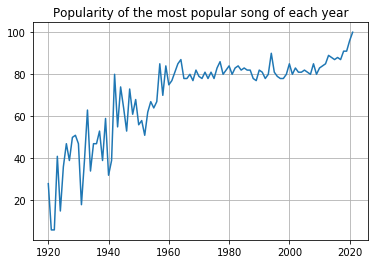

In [77]:
y=pop_song['popularity']
plt.plot(y,label="Popularity")
plt.title("Popularity of the most popular song of each year")
plt.grid()
plt.show()

The graph clearly shows reinforces the fact that the popularity of songs on spotify has increased over time as the most popular song of this year is about 34% more popular than the most popular song in the 1960's.

FEATURE ANALYSIS

Goal: Find out the what makes a song popular and the right set of musical parameters that make a song popular on spotify.


In [78]:
feature_df=df

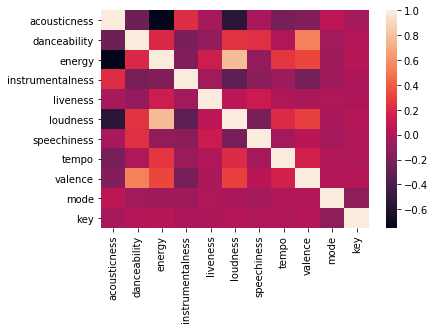

In [79]:
df_small = feature_df[['acousticness', 'danceability',  'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence','mode','key']]
corrMatrix=df_small.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

Some Insights:

1. The acousticness and energy have a high negative correlation.
2. The energy and loudness have a high positive correlation.
3. Danceability and Valence have a positive correlation.
4. Loudeness and Acousticness have a strong negative correlation.

In [81]:
df_small = feature_df[['acousticness', 'danceability',  'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence','year']]
df_pop=feature_df['popularity']
corrMatrix=df_small.corrwith(df_pop)
corrMatrix

acousticness       -0.396744
danceability        0.123746
energy              0.328939
instrumentalness   -0.300625
liveness           -0.078959
loudness            0.337194
speechiness        -0.195329
tempo               0.094985
valence             0.063471
year                0.513227
dtype: float64

The acousticness has a negative correlation with popularity.
Loudness has a positive correlation with popularity.

In [83]:
maj=[]
maj.append(len(df[(df['mode']==1) & (df['popularity']<25)]))
maj.append(len(df[(df['mode']==1) & (df['popularity']>=25) & (df['popularity']<50)]))
maj.append(len(df[(df['mode']==1) & (df['popularity']>=50) & (df['popularity']<75)]))
maj.append(len(df[(df['mode']==1) & (df['popularity']>=75)]))
print(len(df[df['mode']==1]))
mi=[]
mi.append(len(df[(df['mode']==0) & (df['popularity']<25)]))
mi.append(len(df[(df['mode']==0) & (df['popularity']>=25) & (df['popularity']<50)]))
mi.append(len(df[(df['mode']==0) & (df['popularity']>=50) & (df['popularity']<75)]))
mi.append(len(df[(df['mode']==0) & (df['popularity']>=75)]))
print(len(df[df['mode']==0]))
c_table=[]
c_table.append(maj)
c_table.append(mi)
print("Contingency Table:\n\n",c_table)
stat, p, dof, expected = chi2_contingency(c_table)
print("\n\nChi-Square Test Results:",stat,p,dof,expected)
if(p<=0.001):
    print("\n\nNull Hypothesis is rejected. The mode and popularity of songs in the dataset are related.")
else:
    print("\n\nNull Hypothesis is accepted. The mode and popularity of songs in the dataset are not related.")

122488
51901
Contingency Table:

 [[58927, 43980, 18455, 1126], [25904, 16879, 8428, 690]]


Chi-Square Test Results: 235.32844529966354 9.742906186847722e-51 3 [[59583.91600388 42746.37271846 18882.18238536  1275.5288923 ]
 [25247.08399612 18112.62728154  8000.81761464   540.4711077 ]]


Null Hypothesis is rejected. The mode and popularity of songs in the dataset are related.


Major Mode songs are more likely to be popular.

In [84]:
year15=df['year']>=2015
year20=df['year']<=2020
recent_songs=df[year15 & year20]
recent_popl_songs=recent_songs[recent_songs.popularity>42]
recent_popl_songs.sample(10)

acousticness                                  artists  danceability  \
19493        0.85900                        ['Fleetwood Mac']         0.433   
157705       0.00267                               ['Thrice']         0.442   
38332        0.32700               ['Big Sean', 'Jhené Aiko']         0.733   
157591       0.07340  ['Machine Gun Kelly', 'Victoria Monét']         0.654   
19702        0.14900                              ['J. Cole']         0.837   
142245       0.98500                          ['Frank Ocean']         0.657   
157699       0.18600                             ['Yelawolf']         0.752   
158699       0.05780                          ['Miley Cyrus']         0.475   
93418        0.31200                            ['YNW Melly']         0.767   
109378       0.60300                       ['Dani and Lizzy']         0.306   

        energy  explicit                      id  instrumentalness  key  \
19493    0.292         0  5WLyTdKPldPGy25lTpmURT          0.001050    7   
157705   0.892         0  5OeY5LebIOzD9Zvat1Dikf          0.000008    9   
38332    0.334         1  6rje9f1wRFJDO2iTORw0lH          0.000000    1   
157591   0.718         1  4VHhltj6aUxZJWnImrXDhC          0.001210    7   
19702    0.364         1  2JvzF1RMd7lE3KmFlsyZD8          0.000000    8   
142245   0.431         0  1IdZvb2XK8NmsovQlV6CPn          0.000000    7   
157699   0.754         1  2g5cChGDcrjtpRVGA7q4Eh          0.000000    9   
158699   0.565         0  1M7qLcfozANPcMKfgMEHOt          0.000048    1   
93418    0.715         1  4dqkKnzOJ3fWduqKcHi374          0.000000    8   
109378   0.310         0  4kdl5LATOjf8q4bvubBlBI          0.000027   11   

        liveness  loudness  mode                        name  popularity  \
19493     0.1910   -15.157     0   Landslide - 2018 Remaster          44   
157705    0.0758    -6.431     0                 Black Honey          59   
38332     0.1160   -11.314     1                      I Know          67   
157591    0.1640    -6.663     1               A Little More          59   
19702     0.2710   -11.713     1                MIDDLE CHILD          81   
142245    0.1490   -11.147     1                 Be Yourself          61   
157699    0.1100    -5.061     1                American You          57   
158699    0.3410    -7.853     0                 Never Be Me          72   
93418     0.0973    -4.934     0  Virtual (Blue Balenciagas)          67   
109378    0.1120   -10.371     1          Dancing in the Sky          63   

       release_date  speechiness    tempo  valence  year  duration  
19493    2018-11-16       0.0307  160.202    0.505  2018       200  
157705   2016-05-27       0.0860  151.914    0.237  2016       239  
38332    2015-02-24       0.0811  119.935    0.267  2015       320  
157591   2015-10-16       0.0425   90.053    0.234  2015       237  
19702    2019-01-23       0.2760  123.984    0.463  2019       214  
142245   2016-08-20       0.5410   83.509    0.935  2016        87  
157699   2015-04-21       0.1330   82.986    0.353  2015       212  
158699   2020-11-27       0.0378  165.091    0.154  2020       216  
93418    2018-08-03       0.0523  149.957    0.577  2018       194  
109378   2015-06-12       0.0336  207.508    0.126  2015       214

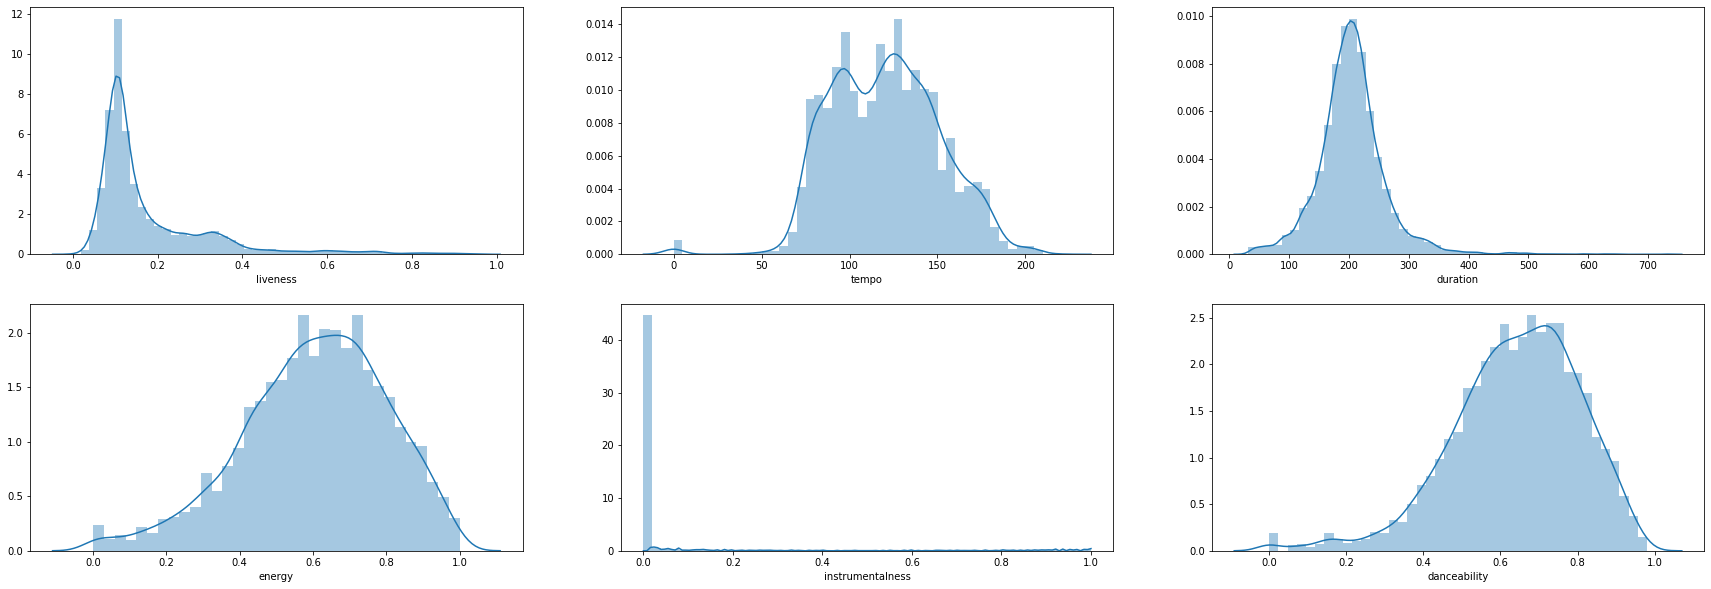

In [86]:
plt.figure(figsize = (30,10))
plt.subplot(231)
sn.distplot(recent_popl_songs['liveness'])
plt.subplot(232)
sn.distplot(recent_popl_songs['tempo'])
plt.subplot(233)
sn.distplot(recent_popl_songs['duration'])
plt.subplot(234)
sn.distplot(recent_popl_songs['energy'])
plt.subplot(235)
sn.distplot(recent_popl_songs['instrumentalness'])
plt.subplot(236)
sn.distplot(recent_popl_songs['danceability'])
plt.show()

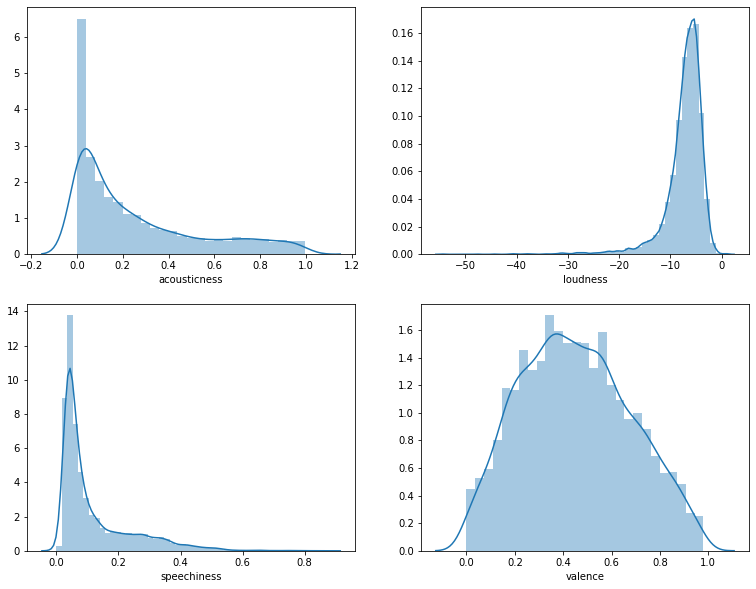

In [87]:
plt.figure(figsize = (20,10))
plt.subplot(231)
sn.distplot(recent_popl_songs['acousticness'])
plt.subplot(232)
sn.distplot(recent_popl_songs['loudness'])
plt.subplot(234)
sn.distplot(recent_popl_songs['speechiness'])
plt.subplot(235)
sn.distplot(recent_popl_songs['valence'])
plt.show()

In [88]:
mode_mapping = {0:"Minor",1:"Major"}
mode_counts_df = pd.DataFrame(recent_popl_songs["mode"].value_counts())
mode_counts_df['mode_names'] = mode_counts_df.index.to_series().map(mode_mapping)

mode_labels = mode_counts_df['mode_names'].values
mode_values = mode_counts_df['mode'].values

key_mapping = {0:"C",1:"C#",2:"D",3:"D#",4:"E",5:"F",6:"F#",7:"G",8:"G#",9:"A",10:"A#",11:"B"}
key_counts_df = pd.DataFrame(recent_popl_songs["key"].value_counts())
key_counts_df['key_names'] = key_counts_df.index.to_series().map(key_mapping)

key_labels =key_counts_df['key_names'].values
key_values = key_counts_df['key'].values




fig = make_subplots(rows=1, cols=2,specs=[[{"type": "pie"},{"type": "pie"}]])
fig.add_trace(
    pgo.Pie(labels=mode_labels, values=mode_values),row=1, col=1)

fig.add_trace(
    pgo.Pie(labels=key_labels, values=key_values),row=1, col=2)

fig.update_traces(textposition='inside', textinfo='percent+label')


fig.update_layout(height=600, width=1200, title_text="Mode")
fig.show()

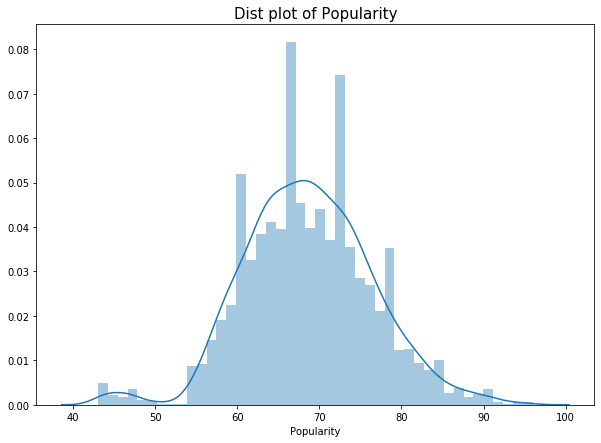

In [89]:
plt.figure(figsize = (10, 7))
sn.distplot(recent_popl_songs.popularity)
plt.title("Dist plot of Popularity", fontdict = {'fontsize' : 15})
plt.xlabel('Popularity')
plt.show()
plt.show()

In [90]:
recent_popl_songs.describe()

acousticness  danceability       energy     explicit  instrumentalness  \
count   5784.000000   5784.000000  5784.000000  5784.000000       5784.000000   
mean       0.260863      0.640856     0.604707     0.427213          0.048978   
std        0.276767      0.165801     0.197186     0.494716          0.183626   
min        0.000000      0.000000     0.000020     0.000000          0.000000   
25%        0.037475      0.542000     0.479000     0.000000          0.000000   
50%        0.152000      0.656000     0.620000     0.000000          0.000000   
75%        0.404250      0.759000     0.745000     1.000000          0.000131   
max        0.996000      0.980000     1.000000     1.000000          1.000000   

               key     liveness     loudness         mode   popularity  \
count  5784.000000  5784.000000  5784.000000  5784.000000  5784.000000   
mean      5.208333     0.180064    -7.294598     0.614627    68.645920   
std       3.585471     0.141912     3.956491     0.486725     7.858387   
min       0.000000     0.000000   -54.376000     0.000000    43.000000   
25%       2.000000     0.098300    -8.382250     0.000000    63.000000   
50%       5.000000     0.122000    -6.525500     1.000000    68.000000   
75%       8.000000     0.213000    -5.056750     1.000000    74.000000   
max      11.000000     0.960000     1.023000     1.000000    96.000000   

       speechiness        tempo      valence         year     duration  
count  5784.000000  5784.000000  5784.000000  5784.000000  5784.000000  
mean      0.118660   120.546420     0.450205  2017.518672   204.778527  
std       0.118055    30.558003     0.226330     1.736487    56.321717  
min       0.000000     0.000000     0.000000  2015.000000    32.000000  
25%       0.040300    96.424500     0.276000  2016.000000   175.000000  
50%       0.064800   120.031000     0.438000  2018.000000   203.000000  
75%       0.153000   141.972250     0.613000  2019.000000   231.000000  
max       0.868000   220.099000     0.980000  2020.000000   733.000000

How to make a popular song?

1. Acousticness: ~0.26 (Low)
2. Danceability: ~0.64 (High)
3. Duration: ~3.4 minutes 
4. Energy: ~0.60 (High)
5. Explicit: The song doesn't have to be expicit. (mean=0.4)
6. Instrumentalness: ~0.04 (Low)
7. Key: C#
8. Liveness: ~0.18 (Low)
9. Loudness: ~-7.29 (High)
10. Mode: Major Mode
11. Speechiness: ~0.11 (Low)
12. Tempo: ~120 bpm (Average)
13. Valence: ~0.45 (Average)

The mean popularity of a song with these attributes would be around 68.64/100.

Hypothesis Testing:

Will the beatles be popular today? Will the beatles fall in the same group as the top 25% of songs in 2015-2020? 

Testing done based on Acousticness and Loudness. 
Motivation: These attributes have the highest negative and positive correlation with popularity.

T tests: The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score the more the difference between the groups is.



1) Acousticness

Null Hypothesis : There is no significant difference between the Beatle's songs'acousticenss and the acousticenss of the top 25% songs of 2015-2020.

Alternate Hypothesis: There is a significant difference between the Beatle's songs' acousticenss and the acousticenss of the top 25% songs of 2015-2020.

In [91]:
beatles=df.groupby(df.artists)
beatles=beatles.get_group("['The Beatles']")

In [92]:
def hyp_check(p):
    if(p<=0.05):
        print("Null Hypothesis is rejected.")
    else:
        print("Null Hypothesis is accepted.")

C:\Users\aarth\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



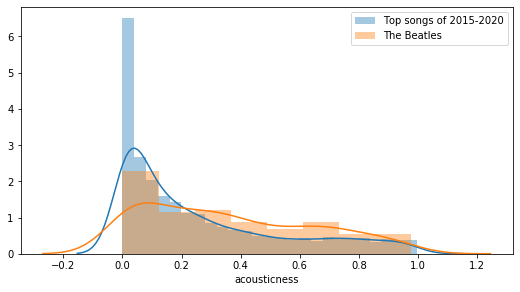

In [93]:
a=recent_popl_songs.acousticness
b=beatles.acousticness
plt.figure(figsize = (30, 10))
plt.subplot(231)
sn.distplot(a,label="Top songs of 2015-2020")
plt.subplot(231)
sn.distplot(b,label="The Beatles")
plt.legend()
plt.show()

In [94]:
print(a.mean(),b.mean())
stat,p=st.ttest_ind(a=a, b=b, equal_var=False)
print(stat,p)

0.26086346528526977 0.359393121116505
-6.849441722430308 2.3361117380348586e-11


In [95]:
hyp_check(p)

Null Hypothesis is rejected.


There is a significant difference between the Beatle's songs' acousticenss and the acousticenss of the top 25% songs of 2015-2020.

1) Loudness

Null Hypothesis : There is no significant difference between the Beatle's songs' loudness and the loudness of the top 25% songs of 2015-2020.

Alternate Hypothesis: There is a significant difference between the Beatle's songs' loudness and the loudness of the top 25% songs of 2015-2020.

C:\Users\aarth\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



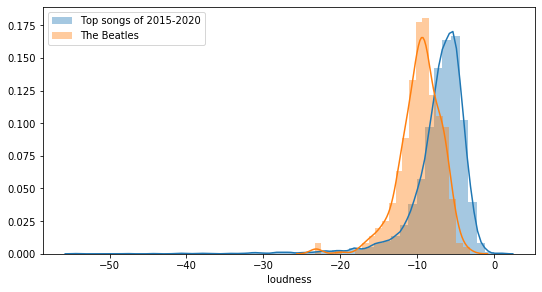

In [96]:
a=recent_popl_songs.loudness
b=beatles.loudness
plt.figure(figsize = (30, 10))
plt.subplot(231)
sn.distplot(a,label="Top songs of 2015-2020")
plt.subplot(231)
sn.distplot(b,label="The Beatles")
plt.legend()
plt.show()

In [97]:
print(a.mean(),b.mean())
stat,p=st.ttest_ind(a=a, b=b, equal_var=False)
print(stat,p)

-7.294598201936376 -9.63633252427185
15.915608851001968 5.4417346413992e-47


In [98]:
hyp_check(p)

Null Hypothesis is rejected.


There is a significant difference between the Beatle's songs' loudness and the loudness of the top 25% songs of 2015-2020.

Based on the above conducted tests, it can be concluded that the Beatles' songs and the top 25% songs of 2015-2020 based on the acosticness and loudness.

So, it may be concluded that The Beatles songs would not have been as popular if they were released today.

Differentating Genres

Clustering

Motivation: Similar songs will belong to the same gener and this will help in recommending songs to users based on their previous choices.

In [99]:
song_features = pd.DataFrame()
# normalizer instance
scaler = MinMaxScaler()
for col in df.iloc[:,:-1].columns:      # excluding year col i.e, of int64 type
    if df[col].dtypes in ['float64', 'int64']:
        # adding normalized col
        scaler.fit(df[[col]])
        song_features[col] = scaler.transform(df[col].values.reshape(-1,1)).ravel() 

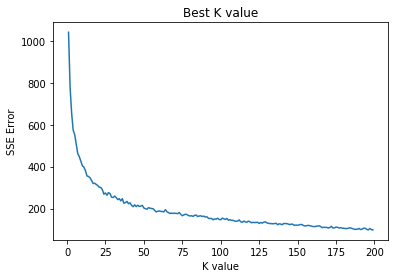

In [100]:
km = KMeans()
k_rng = range(1,200)
sse = [] 
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(song_features.sample(1000))
    sse.append(km.inertia_) 
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')
plt.show()

In [110]:
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_features)
print(predicted_genres)

[ 3  3  7 ... 20 16  4]


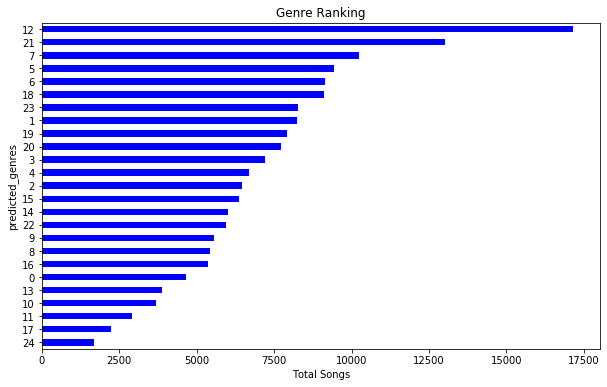

In [111]:
song_features['predicted_genres'] = predicted_genres
genres_grp = song_features.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='blue')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()

In [132]:
df[song_features["predicted_genres"] == 3].sample(10)

acousticness                                            artists  \
97116          0.962  ['Arthur Sullivan', 'Neville Griffith', 'New S...   
131024         0.851                                ['Bill Evans Trio']   
64294          0.945                                 ['Billie Holiday']   
113851         0.952                                    ['Dean Martin']   
95513          0.959                                      ['B Jayamma']   
7457           0.960                                      ['Peggy Lee']   
65191          0.676                               ['Charles Aznavour']   
159724         0.991                          ['Pannalal Bhattacharya']   
148324         0.541                                    ['Tim Buckley']   
71641          0.702                                       ["D'Angelo"]   

        danceability  energy  explicit                      id  \
97116          0.501  0.1020         0  170SXQaMZsDKtgyCUro2uh   
131024         0.575  0.3840         0  03OJm4mCxIuTbjI58e6TrG   
64294          0.506  0.1350         0  4aRtXvhxbC40qMe42OXkFz   
113851         0.267  0.0841         0  1v8p9dDQ8adlLC3iINiRxT   
95513          0.492  0.3130         0  3E1uDOmZfYBVpjifirFVlz   
7457           0.211  0.1800         0  4Pi9CGvYrL5gSMBjkoshok   
65191          0.373  0.4030         0  4fLKe29bH7q286QpHJnR9m   
159724         0.259  0.1650         0  6lMcFjsCl7yL6WApk00dMg   
148324         0.550  0.4280         0  6qxJcZgS7z2aBSwC4PNxVA   
71641          0.511  0.4020         0  5MjUkhqCpr5uZ39xZmLZxe   

        instrumentalness  key  liveness  loudness  mode  \
97116           0.000000    2    0.1250   -17.853     0   
131024          0.248000    0    0.0906   -11.092     0   
64294           0.000984    5    0.0874   -12.406     0   
113851          0.000006    1    0.0960   -18.451     0   
95513           0.408000    1    0.2930   -15.228     0   
7457            0.242000    5    0.2710   -16.177     0   
65191           0.000000    4    0.2960    -7.483     0   
159724          0.359000    4    0.1010   -13.996     0   
148324          0.000009    3    0.1990   -14.260     0   
71641           0.000140    4    0.1100   -10.695     0   

                                                     name  popularity  \
97116   The Sorcerer / Act 2: 25. Prepare for sad surp...           0   
131024  Autumn Leaves - Album Version - (take 2 bonus ...           8   
64294                                I Wished On The Moon          18   
113851                           Love Is All That Matters           9   
95513                                Shubhadathe Gomaathe           0   
7457    The Folks Who Live On The Hill - 2001 Digital ...          38   
65191                                    Bon anniversaire          39   
159724                                    Jetha Achhe Sur           0   
148324                            No Man Can Find the War          24   
71641                  Me And Those Dreamin' Eyes Of Mine          44   

       release_date  speechiness    tempo  valence  year  duration  
97116    1953-01-01       0.1470   66.009    0.308  1953        43  
131024         1960       0.0371  102.926    0.563  1960       320  
64294    1958-01-01       0.0355   92.335    0.296  1958       410  
113851         1956       0.0307   77.688    0.159  1956       185  
95513    1945-01-01       0.2290  151.646    0.532  1945       146  
7457           1957       0.0352   83.208    0.101  1957       218  
65191          1963       0.0355  110.646    0.422  1963       247  
159724   1948-12-01       0.0436  181.037    0.469  1948       192  
148324         1967       0.0595  111.742    0.676  1967       180  
71641    1995-07-03       0.2190   83.339    0.503  1995       287

In [133]:
init_notebook_mode(connected=True)

In [134]:
pca_3d = PCA(n_components=3)

In [135]:
PCs_3d = pd.DataFrame(pca_3d.fit_transform(song_features.drop(["predicted_genres"], axis=1)))

In [136]:
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [137]:
song_features1 = pd.concat([song_features,PCs_3d], axis=1, join='inner')

In [138]:

cluster12 = song_features1[song_features1["predicted_genres"] == 12]
cluster21 = song_features1[song_features1["predicted_genres"] == 21]
cluster7 = song_features1[song_features1["predicted_genres"] == 7]


In [139]:
trace1 = go.Scatter3d(
                    x = cluster12["PC1_3d"],
                    y = cluster12["PC2_3d"],
                    z = cluster12["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 12",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)


trace2 = go.Scatter3d(
                    x = cluster21["PC1_3d"],
                    y = cluster21["PC2_3d"],
                    z = cluster21["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 21",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)


trace3 = go.Scatter3d(
                    x = cluster7["PC1_3d"],
                    y = cluster7["PC2_3d"],
                    z = cluster7["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)
